# Calculate the changes in the zonal mean of PAMIP simulations
Calculate the indices AP (Arctic amplification), ZWRI (Zonal wind response index), SPV (Stratospheric polar vortex)

In [3]:
import subprocess
from itertools import chain
from glob import glob

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from seawater import dist
import pickle

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

plt.rcParams.update({'font.size': 9})


In [2]:
!ls -l /badc/cmip6/data/CMIP6/PAMIP/*/*/pdSST-pdSIC

lrwxrwxrwx 1 badc badcint 57 Aug 12  2019 /badc/cmip6/data/CMIP6/PAMIP/CCCma/CanESM5/pdSST-pdSIC -> /datacentre/archvol5/qb165/archive/spot-36503-pdSST-pdSIC
lrwxrwxrwx 1 badc badcint 57 Mar 14  2020 /badc/cmip6/data/CMIP6/PAMIP/IPSL/IPSL-CM6A-LR/pdSST-pdSIC -> /datacentre/archvol5/qb142/archive/spot-41896-pdSST-pdSIC
lrwxrwxrwx 1 badc badcint 57 Mar  9  2020 /badc/cmip6/data/CMIP6/PAMIP/MIROC/MIROC6/pdSST-pdSIC -> /datacentre/archvol5/qb157/archive/spot-41704-pdSST-pdSIC
lrwxrwxrwx 1 badc badcint 57 Sep 19  2020 /badc/cmip6/data/CMIP6/PAMIP/MOHC/HadGEM3-GC31-MM/pdSST-pdSIC -> /datacentre/archvol5/qb197/archive/spot-45054-pdSST-pdSIC
lrwxrwxrwx 1 badc badcint 57 Aug  6  2019 /badc/cmip6/data/CMIP6/PAMIP/NCAR/CESM2/pdSST-pdSIC -> /datacentre/archvol5/qb140/archive/spot-35849-pdSST-pdSIC
lrwxrwxrwx 1 badc badcint 57 Mar 14  2020 /badc/cmip6/data/CMIP6/PAMIP/NCC/NorESM2-LM/pdSST-pdSIC -> /datacentre/archvol5/qb137/archive/spot-41906-pdSST-pdSIC


In [25]:
!ls -l /badc/cmip6/data/CMIP6/PAMIP/*/*/pdSST-futArcSIC

lrwxrwxrwx 1 badc badcint 61 Aug  6  2019 /badc/cmip6/data/CMIP6/PAMIP/CCCma/CanESM5/pdSST-futArcSIC -> /datacentre/archvol5/qb161/archive/spot-36156-pdSST-futArcSIC
lrwxrwxrwx 1 badc badcint 61 Mar  9  2020 /badc/cmip6/data/CMIP6/PAMIP/MIROC/MIROC6/pdSST-futArcSIC -> /datacentre/archvol5/qb187/archive/spot-41710-pdSST-futArcSIC
lrwxrwxrwx 1 badc badcint 61 Sep 18  2020 /badc/cmip6/data/CMIP6/PAMIP/MOHC/HadGEM3-GC31-MM/pdSST-futArcSIC -> /datacentre/archvol5/qb197/archive/spot-45032-pdSST-futArcSIC
lrwxrwxrwx 1 badc badcint 61 Aug  6  2019 /badc/cmip6/data/CMIP6/PAMIP/NCAR/CESM2/pdSST-futArcSIC -> /datacentre/archvol5/qb143/archive/spot-35837-pdSST-futArcSIC
lrwxrwxrwx 1 badc badcint 61 Mar 14  2020 /badc/cmip6/data/CMIP6/PAMIP/NCC/NorESM2-LM/pdSST-futArcSIC -> /datacentre/archvol5/qb137/archive/spot-41919-pdSST-futArcSIC


In [23]:
!ls /badc/cmip6/data/CMIP6/PAMIP/CCCma/CanESM5/pdSST-pdSIC/

00README_catalogue_and_licence.txt  r28i1p2f1  r47i1p2f1  r66i1p2f1  r85i1p2f1
r100i1p2f1			    r29i1p2f1  r48i1p2f1  r67i1p2f1  r86i1p2f1
r10i1p2f1			    r2i1p2f1   r49i1p2f1  r68i1p2f1  r87i1p2f1
r11i1p2f1			    r30i1p2f1  r4i1p2f1   r69i1p2f1  r88i1p2f1
r12i1p2f1			    r31i1p2f1  r50i1p2f1  r6i1p2f1   r89i1p2f1
r13i1p2f1			    r32i1p2f1  r51i1p2f1  r70i1p2f1  r8i1p2f1
r14i1p2f1			    r33i1p2f1  r52i1p2f1  r71i1p2f1  r90i1p2f1
r15i1p2f1			    r34i1p2f1  r53i1p2f1  r72i1p2f1  r91i1p2f1
r16i1p2f1			    r35i1p2f1  r54i1p2f1  r73i1p2f1  r92i1p2f1
r17i1p2f1			    r36i1p2f1  r55i1p2f1  r74i1p2f1  r93i1p2f1
r18i1p2f1			    r37i1p2f1  r56i1p2f1  r75i1p2f1  r94i1p2f1
r19i1p2f1			    r38i1p2f1  r57i1p2f1  r76i1p2f1  r95i1p2f1
r1i1p2f1			    r39i1p2f1  r58i1p2f1  r77i1p2f1  r96i1p2f1
r20i1p2f1			    r3i1p2f1   r59i1p2f1  r78i1p2f1  r97i1p2f1
r21i1p2f1			    r40i1p2f1  r5i1p2f1   r79i1p2f1  r98i1p2f1
r22i1p2f1			    r41i1p2f1  r60i1p2f1  r7i1p2f1   r99i1p2f1
r23i1p2f1			    r42i1p2f1  r61i1p2f1 

# Load the 3 PAMIP model on JASMIN 
(do not run if nc files are already saved)

## 1) Load the fut/pd ensembles of each model

In [2]:
lines_pd={}; lines_fut={};
mdl=np.array([['HadGEM3-GC31-MM','MOHC/'],
              ['CanESM5','CCCma/'],
              ['CESM2','NCAR/']])
for i in range(mdl.shape[0]):
#     print(i,mdls[i][0],mdls[i][1])
    lines_pd[mdl[i,0]] = subprocess.check_output('ls /badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-pdSIC/', shell=True).splitlines()
    lines_fut[mdl[i,0]] = subprocess.check_output('ls /badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-futArcSIC/', shell=True).splitlines()
    print(mdl[i,0],mdl[i,1],lines_pd[mdl[i,0]][1], lines_pd[mdl[i,0]] == lines_fut[mdl[i,0]], len(lines_pd[mdl[i,0]]))
    
    
ua_diff={}
ua_pd={};
ua_fut={};

HadGEM3-GC31-MM MOHC/ b'r101i1p1f2' True 300
CanESM5 CCCma/ b'r100i1p2f1' True 101
CESM2 NCAR/ b'r100i1p1f1' True 101


In [52]:
!ls /badc/cmip6/data/CMIP6/PAMIP/MOHC/HadGEM3-GC31-MM/pdSST-pdSIC/r102i1p1f2/Amon/ua/gn/latest/

ua_Amon_HadGEM3-GC31-MM_pdSST-pdSIC_r102i1p1f2_gn_200004-200012.nc
ua_Amon_HadGEM3-GC31-MM_pdSST-pdSIC_r102i1p1f2_gn_200101-200105.nc


In [3]:
data_pd = xr.open_mfdataset( '/badc/cmip6/data/CMIP6/PAMIP/MOHC/HadGEM3-GC31-MM/pdSST-pdSIC/r102i1p1f2/Amon/ua/gn/latest/ua_Amon_HadGEM3-GC31-MM_pdSST-pdSIC_r102i1p1f2_gn_200004-200012.nc')
data_pd.data_vars

Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(9, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(325, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(432, 2), meta=np.ndarray>
    ua         (time, plev, lat, lon) float32 dask.array<chunksize=(9, 19, 325, 432), meta=np.ndarray>

In [48]:
!ls /badc/cmip6/data/CMIP6/PAMIP/MOHC/HadGEM3-GC31-MM/pdSST-pdSIC/r102i1p1f2/Amon/tas/gn/latest/

tas_Amon_HadGEM3-GC31-MM_pdSST-pdSIC_r102i1p1f2_gn_200004-200012.nc
tas_Amon_HadGEM3-GC31-MM_pdSST-pdSIC_r102i1p1f2_gn_200101-200105.nc


In [4]:
data_pd = xr.open_mfdataset( '/badc/cmip6/data/CMIP6/PAMIP/MOHC/HadGEM3-GC31-MM/pdSST-pdSIC/r102i1p1f2/Amon/tas/gn/latest/tas_Amon_HadGEM3-GC31-MM_pdSST-pdSIC_r102i1p1f2_gn_200004-200012.nc')
data_pd.data_vars

Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(9, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(324, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(432, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(9, 324, 432), meta=np.ndarray>

## 2) Load the lat/pressure of each model

In [5]:
dataset_pdi={}; lat={}; lon={}; dlat={}; dlon={}; plev={};
for i in range(mdl.shape[0]):
    print(i,mdl[i,0],mdl[i,1],lines_pd[mdl[i,0]][2].decode('utf-8'))
    dataset_pdi[mdl[i,0]] = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-pdSIC/'+lines_pd[mdl[i,0]][2].decode('utf-8')+'/Amon/ua/gn/latest/ua_Amon_'+mdl[i,0]+'_pdSST-pdSIC_'+lines_pd[mdl[i,0]][2].decode('utf-8')+'_gn_*.nc')
    lat[mdl[i,0]] = dataset_pdi[mdl[i,0]].lat.values
    lon[mdl[i,0]] = dataset_pdi[mdl[i,0]].lon.values
    plev[mdl[i,0]] = dataset_pdi[mdl[i,0]].plev.values
    dlat[mdl[i,0]] = np.diff(lat[mdl[i,0]])[0]
    dlon[mdl[i,0]] = np.diff(lon[mdl[i,0]])[0]


0 HadGEM3-GC31-MM MOHC/ r102i1p1f2
1 CanESM5 CCCma/ r10i1p2f1
2 CESM2 NCAR/ r10i1p1f1


/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'ua' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
def DJF(mdli,time_values): # Select Winter DJF
    if (mdli == 'AWI-CM-1-1-MR') or (mdli == 'CNRM-CM6-1') or (mdli == 'IPSL-CM6A-LR') or (mdli == 'MIROC6'):     
        idx_time = np.where( (np.array([i.month for i in pd.to_datetime( time_values )]) < 3) | 
                             (np.array([i.month for i in pd.to_datetime( time_values )]) > 11) )[0]
    else:
        idx_time = np.where( (np.array([i.month for i in time_values]) < 3) | 
                             (np.array([i.month for i in time_values]) > 11) )[0]
    return idx_time

## Load ua for each JASMIN model

In [1]:
for i in range(mdl.shape[0]):
    print(i,mdl[i,0],mdl[i,1])
    ua_pd[mdl[i,0]]=np.full((plev[mdl[i,0]].shape[0],lat[mdl[i,0]].shape[0],len(lines_pd[mdl[i,0]])),np.nan)
    ua_fut[mdl[i,0]]=np.full((plev[mdl[i,0]].shape[0],lat[mdl[i,0]].shape[0],len(lines_fut[mdl[i,0]])),np.nan)
#     ua_diff[mdl[i,0]]=np.full((plev[mdl[i,0]].shape[0],lat[mdl[i,0]].shape[0],len(lines_pd[mdl[i,0]])),np.nan) 
    ua_diff[mdl[i,0]]=np.full((plev[mdl[i,0]].shape[0],lat[mdl[i,0]].shape[0]),np.nan)  # 

    for count_pd, idx_pd in enumerate(lines_pd[mdl[i,0]][1:]):
        if count_pd % 80==0: print(count_pd,idx_pd)
        data_pd = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-pdSIC/'+str(idx_pd.decode('utf-8'))+'/Amon/ua/gn/latest/ua_Amon_'+mdl[i,0]+'_pdSST-pdSIC_'+str(idx_pd.decode('utf-8'))+'_gn_*.nc')
        idx_time_pd = DJF(mdl[i,0],data_pd.time.values)
        ua_pd[mdl[i,0]][:,:,count_pd] = data_pd['ua'][idx_time_pd,:,:].mean('time').mean('lon')
    
    for count_fut, idx_fut in enumerate(lines_fut[mdl[i,0]][1:]):
        data_fut = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-futArcSIC/'+str(idx_fut.decode('utf-8'))+'/Amon/ua/gn/latest/ua_Amon_'+mdl[i,0]+'_pdSST-futArcSIC_'+str(idx_fut.decode('utf-8'))+'_gn_*.nc')
        idx_time_fut = DJF(mdl[i,0],data_fut.time.values)
        ua_fut[mdl[i,0]][:,:,count_fut] = data_fut['ua'][idx_time_fut,:,:].mean('time').mean('lon')
        
    ua_diff[mdl[i,0]] = np.nanmean(ua_fut[mdl[i,0]],axis=2) - np.nanmean(ua_pd[mdl[i,0]],axis=2)

## Save in a nc file

In [39]:
ua_pd_nc={} ; ua_fut_nc={} ; ua_diff_nc={} ;
# for i in range(0,1):
for i in range(mdl.shape[0]):
    ua_pd_nc[mdl[i,0]] = xr.DataArray(ua_pd[mdl[i,0]],
                                           dims=['plev','latitude','ensemble_pd'],
                                          coords={"ensemble_pd":np.arange(ua_pd[mdl[i,0]].shape[2]),
                                          "latitude":lat[mdl[i,0]],
                                          "plev":plev[mdl[i,0]]},
                                           attrs={"long_name":mdl[i,0]})
    ua_fut_nc[mdl[i,0]] = xr.DataArray(ua_fut[mdl[i,0]],
                                           dims=['plev','latitude','ensemble_fut'],
                                          coords={"ensemble_fut":np.arange(ua_fut[mdl[i,0]].shape[2]),
                                          "latitude":lat[mdl[i,0]],
                                          "plev":plev[mdl[i,0]]},
                                           attrs={"long_name":mdl[i,0]})
    ua_diff_nc[mdl[i,0]] = xr.DataArray(ua_diff[mdl[i,0]],
                                           dims=['plev','latitude'],
                                           coords={"latitude":lat[mdl[i,0]],"plev":plev[mdl[i,0]]},
                                           attrs={"long_name":mdl[i,0]})
    
    ds = ua_pd_nc[mdl[i,0]].to_dataset(name = 'ua_pd' )
    ds['ua_fut'] = ua_fut_nc[mdl[i,0]]
    ds['ua_diff'] = ua_diff_nc[mdl[i,0]]

    file_nc = 'data_PAMIP/ua_'+mdl[i,0]+'.nc'
    print ('saving to ', file_nc)
    ds.to_netcdf(file_nc)

saving to  data_PAMIP/ua_CanESM5.nc
saving to  data_PAMIP/ua_CESM2.nc


## 3) Load nc files

In [6]:
ua={} ;
for i in range(mdl.shape[0]):
    file_nc = 'data_PAMIP/ua_'+mdl[i,0]+'.nc'
    ua[mdl[i,0]] = xr.open_dataset( file_nc )
    
ua.keys()

dict_keys(['HadGEM3-GC31-MM', 'CanESM5', 'CESM2'])

# Load the other models from ESGF saved by Stephen
(do not run if nc files are already saved)

In [83]:
!ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM

AS-RCEC  AWI  CAS  CCCma  CNRM-CERFACS	IPSL  MIROC  NCC  NSF-DOE-NCAR


In [7]:
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/NSF-DOE-NCAR/CESM1-WACCM-SC/pdSST-futArcSIC/Amon/ua/gn/latest
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/NCC/NorESM2-LM/pdSST-futArcSIC/Amon/ua/gn/latest
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/MIROC/MIROC6/pdSST-futArcSIC/Amon/ua/gn/latest
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/IPSL/IPSL-CM6A-LR/pdSST-futArcSIC/Amon/ua/gr/latest
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/CNRM-CERFACS/CNRM-CM6-1/pdSST-futArcSIC/Amon/ua/gr/latest
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/CAS/FGOALS-f3-L/pdSST-futArcSIC/Amon/ua/gr/latest
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/AS-RCEC/TaiESM1/pdSST-futArcSIC/Amon/ua/gn/latest
# !ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/AWI/AWI-CM-1-1-MR/pdSST-futArcSIC/Amon/ua/gn/latest

## 4) Load the fut/pd ensembles of each model

In [8]:
mdl2=np.array([['TaiESM1','AS-RCEC/','gn'],
               ['AWI-CM-1-1-MR','AWI/','gn'],
               ['FGOALS-f3-L','CAS/','gr'],
               ['CNRM-CM6-1','CNRM-CERFACS/','gr'],
               ['IPSL-CM6A-LR','IPSL/','gr'],
               ['MIROC6','MIROC/','gn'],
               ['NorESM2-LM','NCC/','gn'],
               ['CESM1-WACCM-SC','NSF-DOE-NCAR/','gn']])

for i in range(mdl2.shape[0]):
    lines_pd[mdl2[i,0]] = subprocess.check_output('ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/'+mdl2[i,1]+mdl2[i,0]+'/pdSST-pdSIC/Amon/ua/'+mdl2[i,2]+'/latest/*', shell=True).splitlines()
    lines_fut[mdl2[i,0]] = subprocess.check_output('ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/'+mdl2[i,1]+mdl2[i,0]+'/pdSST-futArcSIC/Amon/ua/'+mdl2[i,2]+'/latest/*', shell=True).splitlines()
    print(mdl2[i,0],mdl2[i,1], lines_pd[mdl2[i,0]] == lines_fut[mdl2[i,0]], len(lines_pd[mdl2[i,0]]), len(lines_fut[mdl2[i,0]]))

TaiESM1 AS-RCEC/ False 97 91
AWI-CM-1-1-MR AWI/ False 100 100
FGOALS-f3-L CAS/ False 100 100
CNRM-CM6-1 CNRM-CERFACS/ False 401 300
IPSL-CM6A-LR IPSL/ False 200 200
MIROC6 MIROC/ False 100 100
NorESM2-LM NCC/ False 100 200
CESM1-WACCM-SC NSF-DOE-NCAR/ False 299 272


## 5) Load the lat/pressure of each model

In [9]:
for i in range(mdl2.shape[0]):
    print(i,mdl2[i,0],mdl2[i,1],lines_pd[mdl2[i,0]][0])
    dataset_pdi[mdl2[i,0]] = xr.open_mfdataset( lines_pd[mdl2[i,0]][1].decode('utf-8') )
    lat[mdl2[i,0]] = dataset_pdi[mdl2[i,0]].lat.values
    lon[mdl2[i,0]] = dataset_pdi[mdl2[i,0]].lon.values
    plev[mdl2[i,0]] = dataset_pdi[mdl2[i,0]].plev.values
    dlat[mdl2[i,0]] = np.diff(lat[mdl2[i,0]])[0]
    dlon[mdl2[i,0]] = np.diff(lon[mdl2[i,0]])[0]
    

0 TaiESM1 AS-RCEC/ b'/gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/AS-RCEC/TaiESM1/pdSST-pdSIC/Amon/ua/gn/latest/ua_Amon_TaiESM1_pdSST-pdSIC_r100i1p1f1_gn_200004-200106.nc'
1 AWI-CM-1-1-MR AWI/ b'/gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/AWI/AWI-CM-1-1-MR/pdSST-pdSIC/Amon/ua/gn/latest/ua_Amon_AWI-CM-1-1-MR_pdSST-pdSIC_r100i1p1f1_gn_200006-200105.nc'
2 FGOALS-f3-L CAS/ b'/gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/CAS/FGOALS-f3-L/pdSST-pdSIC/Amon/ua/gr/latest/ua_Amon_FGOALS-f3-L_pdSST-pdSIC_r100i1p1f1_gr_200004-200106.nc'
3 CNRM-CM6-1 CNRM-CERFACS/ b'/gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/CNRM-CERFACS/CNRM-CM6-1/pdSST-pdSIC/Amon/ua/gr/latest/ua_Amon_CNRM-CM6-1_pdSST-pdSIC_r100i1p1f2_gr_200004-200105.nc'
4 IPSL-CM6A-LR IPSL/ b'/gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/IPSL/IPSL-CM6A-LR/pdSST-pdSIC/Amon/ua/gr/latest/ua_Amon_IPSL-CM6A-LR_pdSST-pdSIC_r100i1p1f1_gr_200004-200105.nc'
5 MIROC6 MIROC/ b'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'ua' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


## Load ua for each ESGF model

In [2]:
for i in range(2,mdl2.shape[0]):
    print(i,mdl2[i,0],mdl2[i,1])
    ua_pd[mdl2[i,0]]=np.full((plev[mdl2[i,0]].shape[0],lat[mdl2[i,0]].shape[0],len(lines_pd[mdl2[i,0]])),np.nan)
    ua_fut[mdl2[i,0]]=np.full((plev[mdl2[i,0]].shape[0],lat[mdl2[i,0]].shape[0],len(lines_fut[mdl2[i,0]])),np.nan)
    ua_diff[mdl2[i,0]]=np.full((plev[mdl2[i,0]].shape[0],lat[mdl2[i,0]].shape[0]),np.nan)
    for count_pd, idx_pd in enumerate(lines_pd[mdl2[i,0]]):
        data_pd = xr.open_mfdataset(idx_pd.decode('utf-8'))
        idx_time = DJF(mdl2[i,0],data_pd.time.values)
        ua_pd[mdl2[i,0]][:,:,count_pd] = data_pd['ua'][idx_time,:,:].mean('time').mean('lon')
         
    for count_fut, idx_fut in enumerate(lines_fut[mdl2[i,0]]):
        data_fut = xr.open_mfdataset(idx_fut.decode('utf-8'))
        idx_time = DJF(mdl2[i,0],data_fut.time.values)
        ua_fut[mdl2[i,0]][:,:,count_fut] = data_fut['ua'][idx_time,:,:].mean('time').mean('lon')
                
    ua_diff[mdl2[i,0]] = np.nanmean(ua_fut[mdl2[i,0]],axis=2) - np.nanmean(ua_pd[mdl2[i,0]],axis=2)


In [44]:
ua_pd2_nc={} ; ua_fut2_nc={} ; ua_diff2_nc={} ;
# for i in range(1,2):
for i in range(2,mdl2.shape[0]):
    ua_pd2_nc[mdl2[i,0]] = xr.DataArray(ua_pd[mdl2[i,0]],
                                           dims=['plev','latitude','ensemble_pd'],
                                          coords={"ensemble_pd":np.arange(ua_pd[mdl2[i,0]].shape[2]),
                                          "latitude":lat[mdl2[i,0]],
                                          "plev":plev[mdl2[i,0]]},
                                           attrs={"long_name":mdl2[i,0]})
    ua_fut2_nc[mdl2[i,0]] = xr.DataArray(ua_fut[mdl2[i,0]],
                                           dims=['plev','latitude','ensemble_fut'],
                                           coords={"ensemble_fut":np.arange(ua_fut[mdl2[i,0]].shape[2]),
                                          "latitude":lat[mdl2[i,0]],
                                          "plev":plev[mdl2[i,0]]},
                                           attrs={"long_name":mdl2[i,0]})
    ua_diff2_nc[mdl2[i,0]] = xr.DataArray(ua_diff[mdl2[i,0]],
                                           dims=['plev','latitude'],
                                           coords={"latitude":lat[mdl2[i,0]],"plev":plev[mdl2[i,0]]},
                                           attrs={"long_name":mdl2[i,0]})
    
    ds = ua_pd2_nc[mdl2[i,0]].to_dataset(name = 'ua_pd' )
    ds['ua_fut'] = ua_fut2_nc[mdl2[i,0]]
    ds['ua_diff'] = ua_diff2_nc[mdl2[i,0]]

    file_nc = 'data_PAMIP/ua_'+mdl2[i,0]+'.nc'
    print ('saving to ', file_nc)
    ds.to_netcdf(file_nc)


saving to  data_PAMIP/ua_FGOALS-f3-L.nc
saving to  data_PAMIP/ua_CNRM-CM6-1.nc
saving to  data_PAMIP/ua_IPSL-CM6A-LR.nc
saving to  data_PAMIP/ua_MIROC6.nc
saving to  data_PAMIP/ua_NorESM2-LM.nc
saving to  data_PAMIP/ua_CESM1-WACCM-SC.nc


# 6) Load .nc files

In [10]:
for i in range(mdl2.shape[0]):
    file_nc = 'data_PAMIP/ua_'+mdl2[i,0]+'.nc'
    ua[mdl2[i,0]] = xr.open_dataset( file_nc )

ua.keys()

dict_keys(['HadGEM3-GC31-MM', 'CanESM5', 'CESM2', 'TaiESM1', 'AWI-CM-1-1-MR', 'FGOALS-f3-L', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'MIROC6', 'NorESM2-LM', 'CESM1-WACCM-SC'])

# Display ua

0 HadGEM3-GC31-MM
1 CanESM5


<ipython-input-108-11b7900d2fc2>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( ua[mdli].latitude, ua[mdli].plev/100, ua[mdli].ua_diff, cmap='RdBu_r')
<ipython-input-108-11b7900d2fc2>:14: RuntimeWarning: Mean of empty slice
  plt.contour( ua[mdli].latitude, ua[mdli].plev/100, np.nanmean(ua[mdli].ua_pd,axis=2), np.arange(-50,60,8), colors='grey',linewidth=1)
<ipython-input-108-11b7900d2fc2>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour( ua[mdli].latitude, ua[mdli].plev/100, np.nanmean(ua[mdli].ua_pd,axis=2), np.arange(-50,60,8), colors='grey',linewidth=1)


2 CESM2
3 TaiESM1
4 AWI-CM-1-1-MR
5 FGOALS-f3-L
6 CNRM-CM6-1
7 IPSL-CM6A-LR
8 MIROC6
9 NorESM2-LM
10 CESM1-WACCM-SC


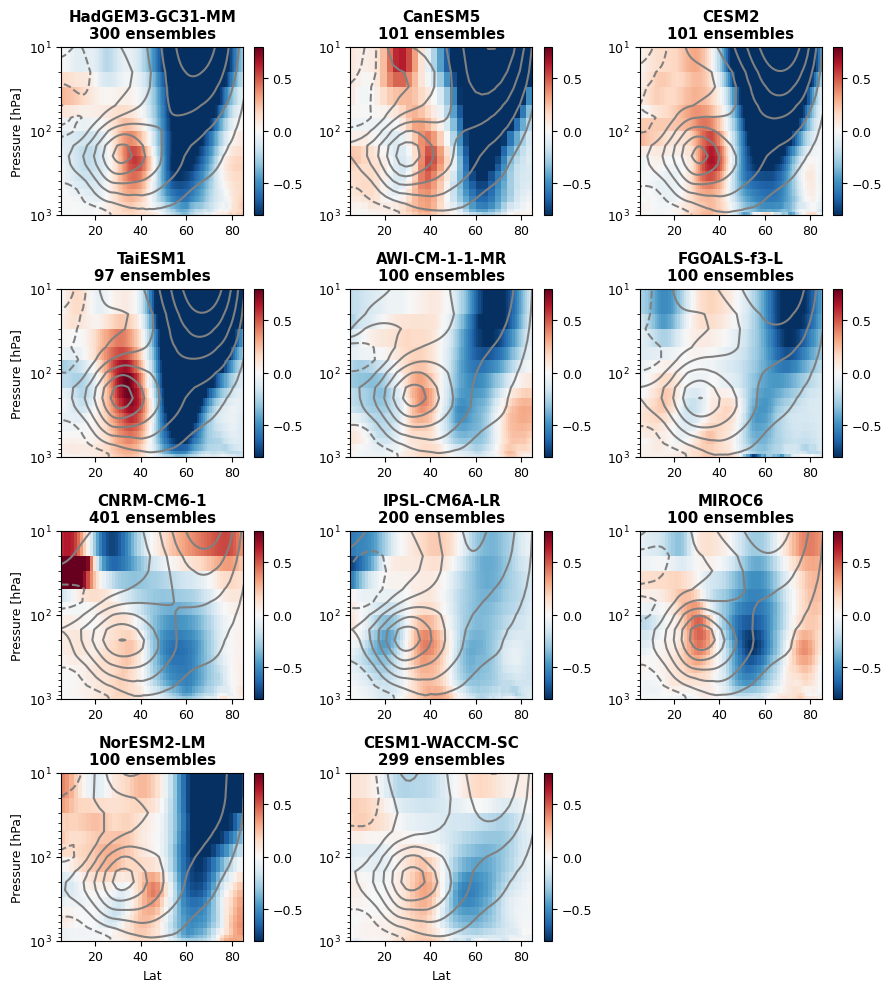

In [108]:
fig = plt.figure(figsize=((9,10)))
fig.patch.set_facecolor('white')
for count, mdli in enumerate(ua.keys()):
    print(count,mdli)
    ax = fig.add_subplot(4,3,count+1)
    plt.pcolormesh( ua[mdli].latitude, ua[mdli].plev/100, ua[mdli].ua_diff, cmap='RdBu_r')
    plt.colorbar() ; plt.clim([-.8,.8])
    plt.gca().invert_yaxis() ;
    plt.yscale('log') ;
    plt.axis([5,85,10**3,10**1]) ;
    if count%3==0: plt.ylabel('Pressure [hPa]') ; 
    if count>8: plt.xlabel('Lat') ; 
    plt.title(mdli+'\n'+str(ua[mdli].ensemble_pd.shape[0])+' ensembles',fontweight='bold')  # -1 to remove 1st line
    plt.contour( ua[mdli].latitude, ua[mdli].plev/100, np.nanmean(ua[mdli].ua_pd,axis=2), np.arange(-50,60,8), colors='grey',linewidth=1)

    plt.tight_layout()

# plt.savefig( 'plots/ua_PAMIP', bbox_inches='tight', pad_inches=0.02, dpi=160)


# 7) Calculate ZWRI
'To quantify the response to Arctic sea ice loss, we define a Zonal Wind Response Index (ZWRI)
 that is calculated as the difference in zonally averaged zonal wind response between 30-39◦N
 and 54-63◦N averaged over 600 to 150 hPa, which correspond to the regions with the largest
 zonal wind responses in the multi-model mean'

In [4]:
def calc_ZWRI(ua,dlon):
    latN = np.where( (ua.latitude <= 63) & (ua.latitude >= 54) )[0]
    latS = np.where( (ua.latitude <= 39) & (ua.latitude >= 30) )[0]
    pressi = np.where( (ua.plev/100 <= 600) & (ua.plev/100 >= 150) )[0]
    # Area-weighted, by the lon extent
    lon_km_N = [dist([ua.latitude[i],ua.latitude[i]],[0,dlon])[0][0] for i in latN]
    lon_km_S = [dist([ua.latitude[i],ua.latitude[i]],[0,dlon])[0][0] for i in latS]
#     print(ua.latitude[latN].shape, np.nanmean(ua.ua_diff[pressi,latN],0).shape, len(lon_km_N) )

    ZWRI = np.nansum( lon_km_S*np.nanmean(ua.ua_diff[pressi,latS],0) )/np.nansum(lon_km_S) - np.nansum( lon_km_N*np.nanmean(ua.ua_diff[pressi,latN],0) )/np.nansum(lon_km_N)
#     ZWRI = np.nansum( lon_km_N*np.nanmean(ua.ua_diff[pressi,latN],0) )/np.nansum(lon_km_N) - np.nansum( lon_km_S*np.nanmean(ua.ua_diff[pressi,latS],0) )/np.nansum(lon_km_S)
    return ZWRI

In [5]:
ZWRI={};
for i in range(mdl.shape[0]): 
    ZWRI[mdl[i,0]]=calc_ZWRI(ua[mdl[i,0]],dlon[mdl[i,0]])
for i in range(mdl2.shape[0]): 
    ZWRI[mdl2[i,0]]=calc_ZWRI(ua[mdl2[i,0]],dlon[mdl2[i,0]])
ZWRI


NameError: name 'mdl' is not defined

In [90]:
# Save data
with open('data_PAMIP/ZWRI_PAMIP.pickle', 'wb') as handle:
# with open('/gws/pw/j05/cop26_hackathons/bristol/project05/project05/data/ZW_PAMIP.pickle', 'wb') as handle:
    pickle.dump(ZWRI, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 8) Calculate ZW, Fig.5a of Barnes2015

In [15]:
def calc_ZW(ua,dlon):
    latN = np.where( (ua.latitude <= 70) & (ua.latitude >= 30) )[0]
    pressi = np.where( (ua.plev/100 <= 600) & (ua.plev/100 >= 150) )[0]
    # Area-weighted, by the lon extent
    lon_km_N = [dist([ua.latitude[i],ua.latitude[i]],[0,dlon])[0][0] for i in latN]
    ZW = np.nansum( lon_km_N*np.nanmean(ua.ua_diff[pressi,latN],0) )/np.nansum(lon_km_N) 
    return ZW

In [17]:
ZW={};
for i in range(mdl.shape[0]): 
    ZW[mdl[i,0]]=calc_ZW(ua[mdl[i,0]],dlon[mdl[i,0]])
for i in range(mdl2.shape[0]): 
    ZW[mdl2[i,0]]=calc_ZW(ua[mdl2[i,0]],dlon[mdl2[i,0]])
ZW


{'HadGEM3-GC31-MM': -0.15431402492810362,
 'CanESM5': -0.13045254736675585,
 'CESM2': -0.1679260861231742,
 'TaiESM1': -0.23621753438989732,
 'AWI-CM-1-1-MR': -0.0779475421306277,
 'FGOALS-f3-L': -0.1113448079471614,
 'CNRM-CM6-1': -0.21847394815745785,
 'IPSL-CM6A-LR': 0.004493293563881653,
 'MIROC6': -0.22716123595677076,
 'NorESM2-LM': -0.0810512516581122,
 'CESM1-WACCM-SC': -0.11239411532279445}

In [3]:
# Save data
# with open('data_PAMIP/ZW_PAMIP.pickle', 'wb') as handle:
with open('/gws/pw/j05/cop26_hackathons/bristol/project05/project05/data/ZW_PAMIP.pickle', 'wb') as handle:
    pickle.dump(ZW, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # Load data
# with open('data_PAMIP/ZW_PAMIP.pickle', 'rb') as handle:
#     ZW2 = pickle.load(handle)

# 9) Calculate SPV
The strength of the stratospheric polar vortex
(SPV) is computed as the zonal-mean zonal wind averaged over 54-66◦N at 10 hPa

In [19]:
def calc_SPV(ua,dlon):
    lati = np.where( (ua.latitude <= 66) & (ua.latitude >= 54) )[0]
    pressi = np.where( ua.plev/100 == 10 )[0][0]
    # Area-weighted, by the lon extent
    lon_km = [dist([ua.latitude[i],ua.latitude[i]],[0,dlon])[0][0] for i in lati]
    SPV = np.nansum( lon_km*ua.ua_diff[pressi,lati] ) / np.nansum(lon_km)
    return SPV


In [20]:
SPV={};
for i in range(mdl.shape[0]): 
    SPV[mdl[i,0]]=calc_SPV(ua[mdl[i,0]],dlon[mdl[i,0]])
for i in range(mdl2.shape[0]): 
    SPV[mdl2[i,0]]=calc_SPV(ua[mdl2[i,0]],dlon[mdl2[i,0]])
SPV

{'HadGEM3-GC31-MM': -1.4307957083285685,
 'CanESM5': -2.0462127062043276,
 'CESM2': -2.967826527526733,
 'TaiESM1': -3.168773250294926,
 'AWI-CM-1-1-MR': -0.2697251302275679,
 'FGOALS-f3-L': -0.4029461032699073,
 'CNRM-CM6-1': 0.8069427376987551,
 'IPSL-CM6A-LR': -0.09575112819481492,
 'MIROC6': 0.13327883539527302,
 'NorESM2-LM': -0.6199931390072976,
 'CESM1-WACCM-SC': 0.4147904600109111}

In [40]:
# Save data
with open('data_PAMIP/SPV_PAMIP.pickle', 'wb') as handle:
# with open('/gws/pw/j05/cop26_hackathons/bristol/project05/project05/data/ZW_PAMIP.pickle', 'wb') as handle:
    pickle.dump(SPV, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load tas, surface T, to calculate Polar Amplification
(do not run if nc files are already saved)

In [139]:
data_pd = xr.open_mfdataset( '/badc/cmip6/data/CMIP6/PAMIP/MOHC/HadGEM3-GC31-MM/pdSST-pdSIC/r102i1p1f2/Amon/tas/gn/latest/tas_Amon_HadGEM3-GC31-MM_pdSST-pdSIC_r102i1p1f2_gn_200004-200012.nc')

In [142]:
data_pd.data_vars

Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(9, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(324, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(432, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(9, 324, 432), meta=np.ndarray>

# Load different grid of T vs s, in lat

In [69]:
dataset_pdi={}; latT={}; lonT={}; dlatT={}; dlonT={};
for i in range(mdl.shape[0]):
    print(i,mdl[i,0],mdl[i,1],lines_pd[mdl[i,0]][2].decode('utf-8'))
    dataset_pdi[mdl[i,0]] = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-pdSIC/'+lines_pd[mdl[i,0]][2].decode('utf-8')+'/Amon/tas/gn/latest/tas_Amon_'+mdl[i,0]+'_pdSST-pdSIC_'+lines_pd[mdl[i,0]][2].decode('utf-8')+'_gn_*.nc')
    latT[mdl[i,0]] = dataset_pdi[mdl[i,0]].lat.values
    lonT[mdl[i,0]] = dataset_pdi[mdl[i,0]].lon.values
    dlatT[mdl[i,0]] = np.diff(latT[mdl[i,0]])[0]
    dlonT[mdl[i,0]] = np.diff(lonT[mdl[i,0]])[0]

0 HadGEM3-GC31-MM MOHC/ r102i1p1f2
1 CanESM5 CCCma/ r10i1p2f1
2 CESM2 NCAR/ r10i1p1f1


/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [86]:
lines_pdT={}; lines_futT={};
for i in range(mdl2.shape[0]):
    if (mdl2[i,0]!='MIROC6') and (mdl2[i,0]!='NorESM2-LM'):
        lines_pdT[mdl2[i,0]] = subprocess.check_output('ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/'+mdl2[i,1]+mdl2[i,0]+'/pdSST-pdSIC/Amon/tas/'+mdl2[i,2]+'/latest/*', shell=True).splitlines()
        lines_futT[mdl2[i,0]] = subprocess.check_output('ls /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/'+mdl2[i,1]+mdl2[i,0]+'/pdSST-futArcSIC/Amon/tas/'+mdl2[i,2]+'/latest/*', shell=True).splitlines()
        print(mdl2[i,0],mdl2[i,1], lines_pdT[mdl2[i,0]] == lines_futT[mdl2[i,0]], len(lines_pdT[mdl2[i,0]]), len(lines_futT[mdl2[i,0]]))

TaiESM1 AS-RCEC/ False 97 92
AWI-CM-1-1-MR AWI/ False 100 100
FGOALS-f3-L CAS/ False 100 100
CNRM-CM6-1 CNRM-CERFACS/ False 434 237
IPSL-CM6A-LR IPSL/ False 200 200
CESM1-WACCM-SC NSF-DOE-NCAR/ False 129 64


In [87]:
for i in range(mdl2.shape[0]):
    if (mdl2[i,0]!='MIROC6') and (mdl2[i,0]!='NorESM2-LM'):
        print(i,mdl2[i,0],mdl2[i,1],lines_pd[mdl2[i,0]][2].decode('utf-8'))
        dataset_pdi[mdl2[i,0]] = xr.open_mfdataset( lines_pdT[mdl2[i,0]][1].decode('utf-8') )
        latT[mdl2[i,0]] = dataset_pdi[mdl2[i,0]].lat.values
        lonT[mdl2[i,0]] = dataset_pdi[mdl2[i,0]].lon.values
        dlatT[mdl2[i,0]] = np.diff(latT[mdl2[i,0]])[0]
        dlonT[mdl2[i,0]] = np.diff(lonT[mdl2[i,0]])[0]

0 TaiESM1 AS-RCEC/ /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/AS-RCEC/TaiESM1/pdSST-pdSIC/Amon/ua/gn/latest/ua_Amon_TaiESM1_pdSST-pdSIC_r11i1p1f1_gn_200004-200106.nc
1 AWI-CM-1-1-MR AWI/ /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/AWI/AWI-CM-1-1-MR/pdSST-pdSIC/Amon/ua/gn/latest/ua_Amon_AWI-CM-1-1-MR_pdSST-pdSIC_r11i1p1f1_gn_200006-200105.nc
2 FGOALS-f3-L CAS/ /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/CAS/FGOALS-f3-L/pdSST-pdSIC/Amon/ua/gr/latest/ua_Amon_FGOALS-f3-L_pdSST-pdSIC_r11i1p1f1_gr_200004-200106.nc
3 CNRM-CM6-1 CNRM-CERFACS/ /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/CNRM-CERFACS/CNRM-CM6-1/pdSST-pdSIC/Amon/ua/gr/latest/ua_Amon_CNRM-CM6-1_pdSST-pdSIC_r101i2p1f2_gr_200204-200305.nc
4 IPSL-CM6A-LR IPSL/ /gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/IPSL/IPSL-CM6A-LR/pdSST-pdSIC/Amon/ua/gr/latest/ua_Amon_IPSL-CM6A-LR_pdSST-pdSIC_r102i1p1f1_gr_200004-200105.nc
7 CESM1-WACCM-SC NSF-DOE-NCAR/ /gws/

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


# JASMIN models

In [4]:
tas_diff={}
tas_pd={};
tas_fut={};

# for i in range(mdl.shape[0]):
for i in range(1,3):
    print(i,mdl[i,0],mdl[i,1])
    tas_pd[mdl[i,0]]=np.full((latT[mdl[i,0]].shape[0],len(lines_pd[mdl[i,0]])),np.nan)
    tas_fut[mdl[i,0]]=np.full((latT[mdl[i,0]].shape[0],len(lines_fut[mdl[i,0]])),np.nan)
    tas_diff[mdl[i,0]]=np.full((latT[mdl[i,0]].shape[0]),np.nan) # lat: 325; lon: 432; plev: 19
    for count_pd, idx_pd in enumerate(lines_pd[mdl[i,0]][1:]):
        if count_pd % 80==0: print(count_pd,idx_pd)
        data_pd = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-pdSIC/'+str(idx_pd.decode('utf-8'))+'/Amon/tas/gn/latest/tas_Amon_'+mdl[i,0]+'_pdSST-pdSIC_'+str(idx_pd.decode('utf-8'))+'_gn_*.nc')
        idx_time_pd = DJF(mdl[i,0],data_pd.time.values)
#         print(tas_pd[mdl[i,0]][:,count_pd].shape, data_pd['tas'][idx_time_pd,:].mean('time').mean('lon').shape)
        tas_pd[mdl[i,0]][:,count_pd] = data_pd['tas'][idx_time_pd,:].mean('time').mean('lon')
    
    for count_fut, idx_fut in enumerate(lines_fut[mdl[i,0]][1:]):
        data_fut = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-futArcSIC/'+str(idx_fut.decode('utf-8'))+'/Amon/tas/gn/latest/tas_Amon_'+mdl[i,0]+'_pdSST-futArcSIC_'+str(idx_fut.decode('utf-8'))+'_gn_*.nc')
        idx_time_fut = DJF(mdl[i,0],data_fut.time.values)
        tas_fut[mdl[i,0]][:,count_fut] = data_fut['tas'][idx_time_fut,:].mean('time').mean('lon')
        
    tas_diff[mdl[i,0]] = np.nanmean(tas_fut[mdl[i,0]],axis=1) - np.nanmean(tas_pd[mdl[i,0]],axis=1)

# ESGF models

In [ ]:
for i in range(1,mdl2.shape[0]):
# for i in range(0,1):
    if (mdl2[i,0]!='MIROC6') and (mdl2[i,0]!='NorESM2-LM'):
        print(i,mdl2[i,0],mdl2[i,1])
        tas_pd[mdl2[i,0]]=np.full((latT[mdl2[i,0]].shape[0],len(lines_pdT[mdl2[i,0]])),np.nan)
        tas_fut[mdl2[i,0]]=np.full((latT[mdl2[i,0]].shape[0],len(lines_futT[mdl2[i,0]])),np.nan)
        tas_diff[mdl2[i,0]]=np.full((latT[mdl2[i,0]].shape[0]),np.nan) # lat: 325; lon: 432; plev: 19
        for count_pd, idx_pd in enumerate(lines_pdT[mdl2[i,0]][1:]):
            if count_pd % 80==0: print(count_pd,idx_pd)
    #         data_pd = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-pdSIC/'+str(idx_pd.decode('utf-8'))+'/Amon/tas/gn/latest/tas_Amon_'+mdl[i,0]+'_pdSST-pdSIC_'+str(idx_pd.decode('utf-8'))+'_gn_*.nc')
            data_pd = xr.open_mfdataset(idx_pd.decode('utf-8'))
            idx_time_pd = DJF(mdl2[i,0],data_pd.time.values)
    #         print(tas_pd[mdl[i,0]][:,count_pd].shape, data_pd['tas'][idx_time_pd,:].mean('time').mean('lon').shape)
            tas_pd[mdl2[i,0]][:,count_pd] = data_pd['tas'][idx_time_pd,:].mean('time').mean('lon')

        for count_fut, idx_fut in enumerate(lines_futT[mdl2[i,0]][1:]):
    #         data_fut = xr.open_mfdataset('/badc/cmip6/data/CMIP6/PAMIP/'+mdl[i,1]+mdl[i,0]+'/pdSST-futArcSIC/'+str(idx_fut.decode('utf-8'))+'/Amon/tas/gn/latest/tas_Amon_'+mdl[i,0]+'_pdSST-futArcSIC_'+str(idx_fut.decode('utf-8'))+'_gn_*.nc')
            data_fut = xr.open_mfdataset(idx_fut.decode('utf-8'))
            idx_time_fut = DJF(mdl2[i,0],data_fut.time.values)
            tas_fut[mdl2[i,0]][:,count_fut] = data_fut['tas'][idx_time_fut,:].mean('time').mean('lon')

        tas_diff[mdl2[i,0]] = np.nanmean(tas_fut[mdl2[i,0]],axis=1) - np.nanmean(tas_pd[mdl2[i,0]],axis=1)

1 AWI-CM-1-1-MR AWI/
0 b'/gws/pw/j05/cop26_hackathons/bristol/project05/data_from_ESM/AWI/AWI-CM-1-1-MR/pdSST-pdSIC/Amon/tas/gn/latest/tas_Amon_AWI-CM-1-1-MR_pdSST-pdSIC_r10i1p1f1_gn_200006-200105.nc'


# Save JASMIN tas in a nc file

In [73]:
tas_pd_nc={} ; tas_fut_nc={} ; tas_diff_nc={} ;
for i in range(1,3):
# for i in range(mdl.shape[0]):
    tas_pd_nc[mdl[i,0]] = xr.DataArray(tas_pd[mdl[i,0]],
                                           dims=['latitude','ensemble_pd'],
                                           coords={"ensemble_pd":np.arange(tas_pd[mdl[i,0]].shape[1]),
                                          "latitude":latT[mdl[i,0]]},
                                           attrs={"long_name":mdl[i,0]})
    tas_fut_nc[mdl[i,0]] = xr.DataArray(tas_fut[mdl[i,0]],
                                           dims=['latitude','ensemble_fut'],
                                          coords={"ensemble_fut":np.arange(tas_fut[mdl[i,0]].shape[1]),
                                          "latitude":latT[mdl[i,0]]},
                                           attrs={"long_name":mdl[i,0]})
    tas_diff_nc[mdl[i,0]] = xr.DataArray(tas_diff[mdl[i,0]],
                                           dims=['latitude'],
                                           coords={"latitude":latT[mdl[i,0]]},
                                           attrs={"long_name":mdl[i,0]})
    
    ds = tas_pd_nc[mdl[i,0]].to_dataset(name = 'tas_pd' )
    ds['tas_fut'] = tas_fut_nc[mdl[i,0]]
    ds['tas_diff'] = tas_diff_nc[mdl[i,0]]

    file_nc = 'data_PAMIP/tas_'+mdl[i,0]+'.nc'
    print ('saving to ', file_nc)
    ds.to_netcdf(file_nc)

saving to  data_PAMIP/tas_CanESM5.nc
saving to  data_PAMIP/tas_CESM2.nc


# 10) Load JASMIN nc files

In [23]:
tas={} ;
for i in range(mdl.shape[0]):
# for i in range(1):
    file_nc = 'data_PAMIP/tas_'+mdl[i,0]+'.nc'
    tas[mdl[i,0]] = xr.open_dataset( file_nc )
tas.keys()

dict_keys(['HadGEM3-GC31-MM', 'CanESM5', 'CESM2'])

# Save ESGF tas in a nc file

In [ ]:
# for i in range(0,1):
for i in range(1,mdl2.shape[0]):
    if (mdl2[i,0]!='MIROC6') and (mdl2[i,0]!='NorESM2-LM'):
        tas_pd_nc[mdl2[i,0]] = xr.DataArray(tas_pd[mdl2[i,0]],
                                               dims=['latitude','ensemble_pd'],
                                               coords={"ensemble_pd":np.arange(tas_pd[mdl2[i,0]].shape[1]),
                                              "latitude":latT[mdl2[i,0]]},
                                               attrs={"long_name":mdl2[i,0]})
        tas_fut_nc[mdl2[i,0]] = xr.DataArray(tas_fut[mdl2[i,0]],
                                               dims=['latitude','ensemble_fut'],
                                              coords={"ensemble_fut":np.arange(tas_fut[mdl2[i,0]].shape[1]),
                                              "latitude":latT[mdl2[i,0]]},
                                               attrs={"long_name":mdl2[i,0]})
        tas_diff_nc[mdl2[i,0]] = xr.DataArray(tas_diff[mdl2[i,0]],
                                               dims=['latitude'],
                                               coords={"latitude":latT[mdl2[i,0]]},
                                               attrs={"long_name":mdl2[i,0]})

        ds = tas_pd_nc[mdl2[i,0]].to_dataset(name = 'tas_pd' )
        ds['tas_fut'] = tas_fut_nc[mdl2[i,0]]
        ds['tas_diff'] = tas_diff_nc[mdl2[i,0]]

        file_nc = 'data_PAMIP/tas_'+mdl2[i,0]+'.nc'
        print ('saving to ', file_nc)
        ds.to_netcdf(file_nc)

# 10) Load ESGF nc files

In [26]:
for i in range(mdl2.shape[0]):
# for i in range(1):
    if (mdl2[i,0]!='MIROC6') and (mdl2[i,0]!='NorESM2-LM'):
        file_nc = 'data_PAMIP/tas_'+mdl2[i,0]+'.nc'
        tas[mdl2[i,0]] = xr.open_dataset( file_nc )
tas.keys()

dict_keys(['HadGEM3-GC31-MM', 'CanESM5', 'CESM2', 'TaiESM1', 'AWI-CM-1-1-MR', 'FGOALS-f3-L', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'CESM1-WACCM-SC'])

# 11) Calculate Arctic amplification AP

In [27]:
def calc_AP(tas,dlon):
    lati = np.where( tas.latitude >= 70 )[0]
    # Area-weighted, by the lon extent
    lon_km_tot = [dist([i,i],[0,dlon])[0][0] for i in tas.latitude]
    lon_kmi = [dist([tas.latitude[i],tas.latitude[i]],[0,dlon])[0][0] for i in lati]
    AP = np.nansum( lon_kmi*tas.tas_diff[lati] ) / np.nansum(lon_kmi) - np.nansum( lon_km_tot*tas.tas_diff ) / np.nansum(lon_km_tot)
    return AP

In [28]:
AP={};
for i in range(mdl.shape[0]): 
    AP[mdl[i,0]]=calc_AP(tas[mdl[i,0]],dlon[mdl[i,0]])
for i in range(mdl2.shape[0]): 
    if (mdl2[i,0]!='MIROC6') and (mdl2[i,0]!='NorESM2-LM'):
        AP[mdl2[i,0]]=calc_AP(tas[mdl2[i,0]],dlon[mdl2[i,0]])
AP


{'HadGEM3-GC31-MM': 3.152738864770705,
 'CanESM5': 2.919641938971796,
 'CESM2': 3.4989085608711497,
 'TaiESM1': 3.319540841698985,
 'AWI-CM-1-1-MR': 3.211948464019931,
 'FGOALS-f3-L': 2.774893133047461,
 'CNRM-CM6-1': 3.237657754884969,
 'IPSL-CM6A-LR': 3.1567649339356554,
 'CESM1-WACCM-SC': 3.2433027420987965}

In [1]:
# Save data
with open('data_PAMIP/AP_PAMIP.pickle', 'wb') as handle:
# with open('/gws/pw/j05/cop26_hackathons/bristol/project05/project05/data/ZW_PAMIP.pickle', 'wb') as handle:
    pickle.dump(AP, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    

FileNotFoundError: [Errno 2] No such file or directory: 'data_PAMIP/AP_PAMIP.pickle'

0 HadGEM3-GC31-MM
1 CanESM5
2 CESM2
3 TaiESM1
4 AWI-CM-1-1-MR
5 FGOALS-f3-L
6 CNRM-CM6-1
7 IPSL-CM6A-LR
8 CESM1-WACCM-SC
0 HadGEM3-GC31-MM
1 CanESM5
2 CESM2
3 TaiESM1
4 AWI-CM-1-1-MR
5 FGOALS-f3-L
6 CNRM-CM6-1
7 IPSL-CM6A-LR
8 CESM1-WACCM-SC
0 HadGEM3-GC31-MM
1 CanESM5
2 CESM2
3 TaiESM1
4 AWI-CM-1-1-MR
5 FGOALS-f3-L
6 CNRM-CM6-1
7 IPSL-CM6A-LR
8 CESM1-WACCM-SC


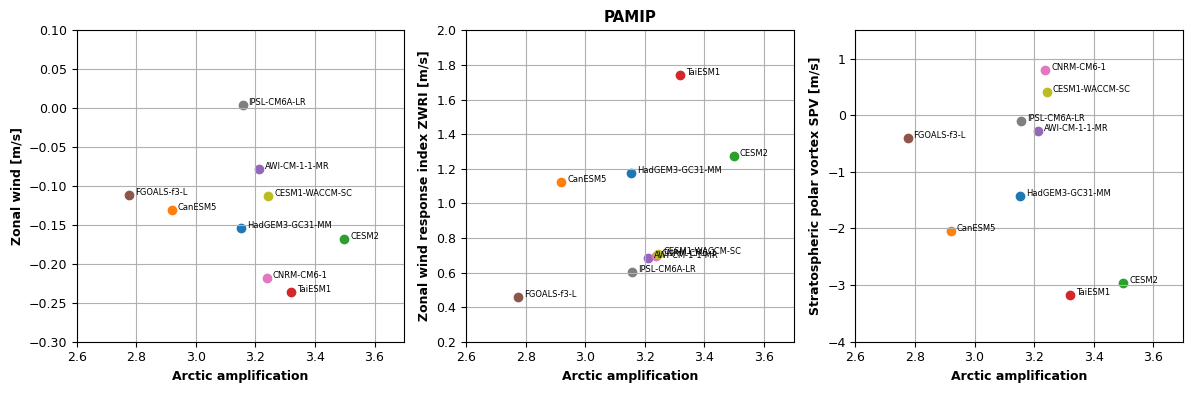

In [107]:
fig = plt.figure(figsize=((12,4)))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,3,1)
for count, mdli in enumerate(tas.keys()):
    print(count,mdli)
    plt.scatter(AP[mdli],ZW[mdli])
    plt.text(0.02+AP[mdli],ZW[mdli],mdli,fontsize=6)
    plt.xlabel('Arctic amplification',fontweight='bold')
    plt.ylabel('Zonal wind [m/s]',fontweight='bold')
    plt.grid() ; plt.axis([2.6,3.7,-0.3,0.1]) ;
    
ax = fig.add_subplot(1,3,2)
for count, mdli in enumerate(tas.keys()):
    print(count,mdli)
    plt.scatter(AP[mdli],ZWRI[mdli])
    plt.text(0.02+AP[mdli],ZWRI[mdli],mdli,fontsize=6)
    plt.xlabel('Arctic amplification',fontweight='bold')
    plt.ylabel('Zonal wind response index ZWRI [m/s]',fontweight='bold')
    plt.grid() ; plt.title('PAMIP',fontweight='bold') ; plt.axis([2.6,3.7,0.2,2]) ;
    
ax = fig.add_subplot(1,3,3)
for count, mdli in enumerate(tas.keys()):
    print(count,mdli)
    plt.scatter(AP[mdli],SPV[mdli])
    plt.text(0.02+AP[mdli],SPV[mdli],mdli,fontsize=6)
    plt.xlabel('Arctic amplification',fontweight='bold')
    plt.ylabel('Stratospheric polar vortex SPV [m/s]',fontweight='bold')
    plt.grid() ; plt.axis([2.6,3.7,-4,1.5]) ;
    
plt.tight_layout()

# plt.savefig( 'plots/AP_PAMIP', bbox_inches='tight', pad_inches=0.02, dpi=160)


In [45]:
#  Load CMIP6 data
with open('/gws/pw/j05/cop26_hackathons/bristol/project05/project05/data/spv_ind_cmip6_scenariomip_scen585_2069-2099_hist_1981-2010.pkl', 'rb') as handle:
    SPV_CMIP6 = pickle.load(handle)
with open('/gws/pw/j05/cop26_hackathons/bristol/project05/project05/data/zwri_ind_cmip6_scenariomip_scen585_2069-2099_hist_1981-2010.pkl', 'rb') as handle:
    ZWRI_CMIP6 = pickle.load(handle)

In [71]:
# PAMIP_CMIP=np.array([['HadGEM3-GC31-MM','MOHC/'],
#               ['CanESM5','CCCma/'],
#               ['CESM2','NCAR/']
#               ['FGOALS-f3-L','FGOALS-g3'],
#               ['CNRM-CM6-1',]])
tas.keys(), ua.keys()


(dict_keys(['HadGEM3-GC31-MM', 'CanESM5', 'CESM2', 'TaiESM1', 'AWI-CM-1-1-MR', 'FGOALS-f3-L', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'CESM1-WACCM-SC']),
 dict_keys(['HadGEM3-GC31-MM', 'CanESM5', 'CESM2', 'TaiESM1', 'AWI-CM-1-1-MR', 'FGOALS-f3-L', 'CNRM-CM6-1', 'IPSL-CM6A-LR', 'MIROC6', 'NorESM2-LM', 'CESM1-WACCM-SC']))

0 HadGEM3-GC31-MM
1 CanESM5
2 CESM2
4 AWI-CM-1-1-MR
5 FGOALS-f3-L
8 MIROC6
9 NorESM2-LM
10 CESM1-WACCM-SC
0 HadGEM3-GC31-MM
1 CanESM5
2 CESM2
4 AWI-CM-1-1-MR
5 FGOALS-f3-L
8 MIROC6
9 NorESM2-LM
10 CESM1-WACCM-SC


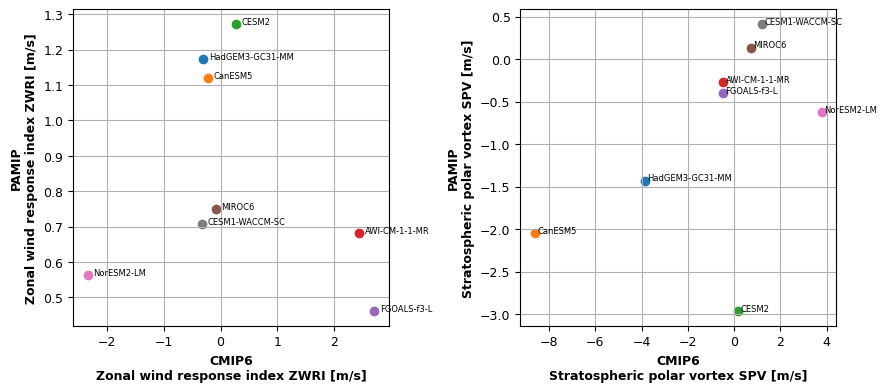

In [106]:
fig = plt.figure(figsize=((13,4)))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,3,1)
for count, mdli in enumerate(ua.keys()):
    if (mdli!='TaiESM1') and (mdli!='CNRM-CM6-1') and (mdli!='IPSL-CM6A-LR'):
        if (mdli=='FGOALS-f3-L'):
            mdli2='FGOALS-g3'
        elif (mdli=='CESM1-WACCM-SC'):
            mdli2='CESM2-WACCM'
        else:
            mdli2=mdli
        print(count,mdli)
        plt.scatter(-ZWRI_CMIP6[mdli2],ZWRI[mdli])
        plt.text(0.1-ZWRI_CMIP6[mdli2],ZWRI[mdli],mdli,fontsize=6)
    #     plt.text(0.02+AP[mdli],ZWRI[mdli],mdli,fontsize=6)
    plt.xlabel('CMIP6'+'\n'+'Zonal wind response index ZWRI [m/s]',fontweight='bold')
    plt.ylabel('PAMIP'+'\n'+'Zonal wind response index ZWRI [m/s]',fontweight='bold')
    plt.grid() ; 
#     plt.title('PAMIP') ;  
#     plt.axis([-3,.5,0.2,1.6]) ;
    #     plt.axis([2.6,3.7,0.2,2]) ;

ax = fig.add_subplot(1,3,2)
for count, mdli in enumerate(ua.keys()):
    if (mdli!='TaiESM1') and (mdli!='CNRM-CM6-1') and (mdli!='IPSL-CM6A-LR'):
        if (mdli=='FGOALS-f3-L'):
            mdli2='FGOALS-g3'
        elif (mdli=='CESM1-WACCM-SC'):
            mdli2='CESM2-WACCM'
        else:
            mdli2=mdli
        print(count,mdli)
        plt.scatter(SPV_CMIP6[mdli2],SPV[mdli])
        plt.text(0.1+SPV_CMIP6[mdli2],SPV[mdli],mdli,fontsize=6)
    plt.xlabel('CMIP6'+'\n'+'Stratospheric polar vortex SPV [m/s]',fontweight='bold')
    plt.ylabel('PAMIP'+'\n'+'Stratospheric polar vortex SPV [m/s]',fontweight='bold')
    plt.grid() ; 
#     plt.axis([-10,2,-4,1.5]) ;

plt.tight_layout()

plt.savefig( 'plots/CMIP6_PAMIP', bbox_inches='tight', pad_inches=0.02, dpi=160 )



In [103]:
SPV_CMIP6
# ZWRI_CMIP6

{'AWI-CM-1-1-MR': -0.4637574553489685,
 'BCC-CSM2-MR': -2.2999191284179688,
 'CAMS-CSM1-0': -2.07947039604187,
 'CAS-ESM2-0': 2.6146414279937744,
 'FGOALS-g3': -0.4816909730434418,
 'IITM-ESM': -2.9183499813079834,
 'CanESM5': -8.625614166259766,
 'CanESM5-CanOE': 5.7635602951049805,
 'CMCC-CM2-SR5': 6.318386554718018,
 'CMCC-ESM2': 3.7397732734680176,
 'ACCESS-ESM1-5': 1.7259727716445923,
 'ACCESS-CM2': 6.592430114746094,
 'FIO-ESM-2-0': 3.5007500648498535,
 'MIROC-ES2L': 3.6639962196350098,
 'MIROC6': 0.7292734384536743,
 'HadGEM3-GC31-LL': -2.081024169921875,
 'HadGEM3-GC31-MM': -3.858177900314331,
 'UKESM1-0-LL': nan,
 'MPI-ESM1-2-HR': 0.7086142301559448,
 'MPI-ESM1-2-LR': 1.4632238149642944,
 'MRI-ESM2-0': 4.392688274383545,
 'GISS-E2-1-G': 5.825124263763428,
 'CESM2': 0.17979870736598969,
 'CESM2-WACCM': 1.1953787803649902,
 'NorESM2-LM': 3.776552677154541,
 'NorESM2-MM': -0.9715721607208252,
 'NESM3': 3.9508721828460693,
 'MCM-UA-1-0': nan}

In [2]:
ZWRI

NameError: name 'ZWRI' is not defined